In [1]:
#pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay

In [22]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [23]:
data = pd.read_csv("merged.csv")
#data

In [24]:
X = data.drop(columns = ['Unnamed: 0.1', 'msi_status','Unnamed: 0','TBL','fraction_genome_altered','aneuploidy_score','TMB'], axis=1)
y = data['msi_status']
le = LabelEncoder()
X = X.apply(le.fit_transform)
#Test and train set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
#Train set split into train and validation set
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [25]:
#Oversampling/Training/Prediction/Metrics
# Oversample the training set using SMOTE
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Train a polynomial SVM 
over_poly = svm.SVC(kernel='poly', degree=1, C=1).fit(X_train_oversampled, y_train_oversampled)
# Train an rbf SVM
over_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1.5).fit(X_train_oversampled, y_train_oversampled)

# Predict on validation
over_poly_pred = over_poly.predict(X_val)
over_rbf_pred = over_rbf.predict(X_val)

# Evaluate the model performance on oversampled data polynomial kernel SVM
accuracy_poly = metrics.accuracy_score(y_val, over_poly_pred)
conf_matrix_poly = metrics.confusion_matrix(y_val, over_poly_pred)
classification_report_poly = metrics.classification_report(y_val, over_poly_pred)
# Evaluate the model performance on oversampled data rbf kernel SVM
accuracy_rbf = metrics.accuracy_score(y_val, over_rbf_pred)
conf_matrix_rbf = metrics.confusion_matrix(y_val, over_rbf_pred)
classification_report_rbf = metrics.classification_report(y_val, over_rbf_pred)

print(f"Accuracy on Oversampled Data for Polynomial kernel SVM: {accuracy_poly:.2f}")
print(f"Confusion Matrix on Oversampled Data for Polynomial kernel SVM:\n{conf_matrix_poly}")
print("Classification Report on Oversampled Data for Polynomial kernel SVM:\n", classification_report_poly)
print(f"Accuracy on Oversampled Data for RBF kernel SVM: {accuracy_rbf:.2f}")
print(f"Confusion Matrix on Oversampled Data for RBF kernel SVM:\n{conf_matrix_rbf}")
print("Classification Report on Oversampled Data for RBF kernel SVM:\n", classification_report_rbf)

Accuracy on Oversampled Data for Polynomial kernel SVM: 0.63
Confusion Matrix on Oversampled Data for Polynomial kernel SVM:
[[13  0  0]
 [ 0  3 10]
 [ 4 18 39]]
Classification Report on Oversampled Data for Polynomial kernel SVM:
               precision    recall  f1-score   support

       MSI-H       0.76      1.00      0.87        13
       MSI-L       0.14      0.23      0.18        13
         MSS       0.80      0.64      0.71        61

    accuracy                           0.63        87
   macro avg       0.57      0.62      0.58        87
weighted avg       0.69      0.63      0.65        87

Accuracy on Oversampled Data for RBF kernel SVM: 0.70
Confusion Matrix on Oversampled Data for RBF kernel SVM:
[[ 0  0 13]
 [ 0  0 13]
 [ 0  0 61]]
Classification Report on Oversampled Data for RBF kernel SVM:
               precision    recall  f1-score   support

       MSI-H       0.00      0.00      0.00        13
       MSI-L       0.00      0.00      0.00        13
         MSS 

C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
#TRAINING on not oversampled data
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train) #C-regularization param, gamma: kernel coefficient
poly = svm.SVC(kernel='poly', degree=1, C=1).fit(X_train, y_train) #degree of polynomial kernel function
#prediction for not oversampled
poly_pred = poly.predict(X_val)
rbf_pred = rbf.predict(X_val)
#Classification report
print("Classification report for polinomial kernel on not oversampled data")
print("Accuracy: ", metrics.accuracy_score(y_val, poly_pred))
print(metrics.classification_report(y_val, poly_pred))
print(metrics.confusion_matrix(y_val, poly_pred))

print("Classification report for rbf kernel on not oversampled data")
print("Accuracy: ", metrics.accuracy_score(y_val, rbf_pred))
print(metrics.classification_report(y_val, rbf_pred))
print(metrics.confusion_matrix(y_val, rbf_pred))

Classification report for polinomial kernel on not oversampled data
Accuracy:  0.8390804597701149
              precision    recall  f1-score   support

       MSI-H       1.00      0.92      0.96        13
       MSI-L       0.00      0.00      0.00        13
         MSS       0.81      1.00      0.90        61

    accuracy                           0.84        87
   macro avg       0.60      0.64      0.62        87
weighted avg       0.72      0.84      0.77        87

[[12  0  1]
 [ 0  0 13]
 [ 0  0 61]]
Classification report for rbf kernel on not oversampled data
Accuracy:  0.7011494252873564
              precision    recall  f1-score   support

       MSI-H       0.00      0.00      0.00        13
       MSI-L       0.00      0.00      0.00        13
         MSS       0.70      1.00      0.82        61

    accuracy                           0.70        87
   macro avg       0.23      0.33      0.27        87
weighted avg       0.49      0.70      0.58        87

[[ 0  0 13]


C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packag

In [27]:
#C value search for rbf and poly kernel
Cvalues = [x / 10.0 for x in range(10, 100, 5)]
print(Cvalues)

listofaccuracypoly = []
listofaccuracyrbf = []
for i in Cvalues:
    model = svm.SVC(kernel='poly', degree=1, C=i).fit(X_train_oversampled, y_train_oversampled)
    prediction = model.predict(X_val)
    accuracy = accuracy_score(y_val, prediction)
    listofaccuracypoly.append(accuracy)
    #print({"Accuracy:":accuracy, "C value: ":i})

for i in Cvalues:
    model = svm.SVC(kernel='rbf', degree=1, C=i).fit(X_train_oversampled, y_train_oversampled)
    prediction = model.predict(X_val)
    accuracy = accuracy_score(y_val, prediction)
    listofaccuracyrbf.append(accuracy)


#plt.plot(Cvalues, listofaccuracy)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


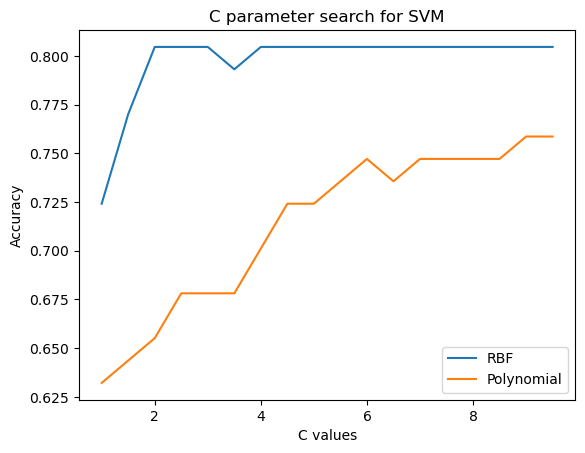

In [28]:
plt.plot(Cvalues, listofaccuracyrbf)
plt.plot(Cvalues, listofaccuracypoly)
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("C parameter search for SVM")
plt.legend(['RBF', "Polynomial"])

#plt.savefig('C_parameter_search_for_SVM.png')
plt.show()

In [30]:
#looking for best hyperparameters RBF SVM, C and gamma
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto']
}

# Create an SVM classifier with polynomial kernel
svm_classifier = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model_rbf = SVC(kernel='rbf', **best_params)
best_svm_model_rbf.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model on the test set bc just
accuracy_rbf = best_svm_model_rbf.score(X_val, y_val)

In [31]:
print(accuracy_rbf)
print(best_params)

0.8045977011494253
{'C': 10, 'gamma': 'scale'}


In [33]:
#Prediction using C 1 and gamma 1 for rbf kernel
#TEST IS GOOD HERE
grid_prediction_rbf = grid_search.predict(X_test)
print(best_params)
print(best_svm_model_rbf)
print("Classification report for RBF kernel after grid search on test set")
print("Accuracy: ", metrics.accuracy_score(y_test, grid_prediction_rbf))
print(metrics.classification_report(y_test, grid_prediction_rbf))
print(metrics.confusion_matrix(y_test, grid_prediction_rbf))
#print("area under curve (auc): ", metrics.roc_auc_score(y_test, grid_prediction_rbf))

{'C': 10, 'gamma': 'scale'}
SVC(C=10)
Classification report for RBF kernel after grid search on test set
Accuracy:  0.8045977011494253
              precision    recall  f1-score   support

       MSI-H       1.00      0.92      0.96        13
       MSI-L       0.25      0.07      0.11        14
         MSS       0.80      0.95      0.87        60

    accuracy                           0.80        87
   macro avg       0.68      0.65      0.65        87
weighted avg       0.74      0.80      0.76        87

[[12  0  1]
 [ 0  1 13]
 [ 0  3 57]]


In [38]:
#print("area under curve (auc): ", metrics.roc_auc_score(y_test, 3, grid_prediction_rbf, 3))
#print(y_test)

In [39]:
#looking for best hyperparameters Polynomial kernel SVM, C and gamma, degree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 0.3, 0.5, 1, 10],
    'gamma': [1, 0.1, 0.01, 'scale', 'auto'],
    'degree': [1]
}

# Create an SVM classifier with polynomial kernel
svm_classifier = SVC(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model_poly = SVC(kernel='poly', **best_params)
best_svm_model_poly.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model
accuracy_poly = best_svm_model_poly.score(X_val, y_val)

In [41]:
print(accuracy_poly)
print(best_params)

0.735632183908046
{'C': 0.1, 'degree': 1, 'gamma': 1}


In [42]:
grid_prediction_poly = grid_search.predict(X_val)
print(best_svm_model_poly)
print("Classification report for polynomial kernel after grid search on validation set")
print("Accuracy: ", metrics.accuracy_score(y_val, grid_prediction_poly))
print(metrics.classification_report(y_val, grid_prediction_poly))
print(metrics.confusion_matrix(y_val, grid_prediction_poly))


SVC(C=0.1, degree=1, gamma=1, kernel='poly')
Classification report for polynomial kernel after grid search on validation set
Accuracy:  0.735632183908046
              precision    recall  f1-score   support

       MSI-H       0.92      0.92      0.92        13
       MSI-L       0.21      0.23      0.22        13
         MSS       0.82      0.80      0.81        61

    accuracy                           0.74        87
   macro avg       0.65      0.65      0.65        87
weighted avg       0.74      0.74      0.74        87

[[12  0  1]
 [ 0  3 10]
 [ 1 11 49]]


In [43]:
#Prediction using {'C': 0.1, 'degree': 1, 'gamma': 1} for polynomial kernel with 0.735632183908046 accuracy
grid_prediction_poly = grid_search.predict(X_test)
print(best_svm_model_poly)
print("Classification report for polynomial kernel after grid search on test set")
print("Accuracy: ", metrics.accuracy_score(y_test, grid_prediction_poly))
print(metrics.classification_report(y_test, grid_prediction_poly))
print(metrics.confusion_matrix(y_test, grid_prediction_poly))
#print("area under curve (auc): ", metrics.roc_auc_score(y_test, grid_prediction_poly))

SVC(C=0.1, degree=1, gamma=1, kernel='poly')
Classification report for polynomial kernel after grid search on test set
Accuracy:  0.6896551724137931
              precision    recall  f1-score   support

       MSI-H       0.92      0.85      0.88        13
       MSI-L       0.14      0.14      0.14        14
         MSS       0.77      0.78      0.78        60

    accuracy                           0.69        87
   macro avg       0.61      0.59      0.60        87
weighted avg       0.69      0.69      0.69        87

[[11  0  2]
 [ 0  2 12]
 [ 1 12 47]]


In [44]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}

# Create the RandomizedSearchCV object
randomized_search = RandomizedSearchCV(estimator=SVC(), param_distributions=param_dist, n_iter=20, cv=5)

randomized_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters and model
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_

# Evaluate the best model on test set
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)

In [46]:
print(f"Best SVM Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")
print("Classification report for SVM after randomized search on test set")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_best_rand))
print(metrics.classification_report(y_test, y_pred_best_rand))
print(metrics.confusion_matrix(y_test, y_pred_best_rand))
#print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred_best_rand))

Best SVM Accuracy: 0.74
Best Hyperparameters: {'C': 0.5777541877593805, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report for SVM after randomized search on test set
Accuracy:  0.735632183908046
              precision    recall  f1-score   support

       MSI-H       0.80      0.92      0.86        13
       MSI-L       0.25      0.21      0.23        14
         MSS       0.82      0.82      0.82        60

    accuracy                           0.74        87
   macro avg       0.62      0.65      0.63        87
weighted avg       0.72      0.74      0.73        87

[[12  0  1]
 [ 1  3 10]
 [ 2  9 49]]


ROC curve using micro-averaged OvR
y_score:
[[1.59017803e-04 6.11881259e-02 9.38652856e-01]
 [4.45596253e-03 5.76135488e-01 4.19408549e-01]]

y_score.ravel():
[1.59017803e-04 6.11881259e-02 9.38652856e-01 4.45596253e-03
 5.76135488e-01 4.19408549e-01]
Micro-averaged One-vs-Rest ROC AUC score:
0.67
Micro-averaged One-vs-Rest ROC AUC score:
0.67
Macro-averaged One-vs-Rest ROC AUC score:
0.42
Macro-averaged One-vs-Rest ROC AUC score:
0.42


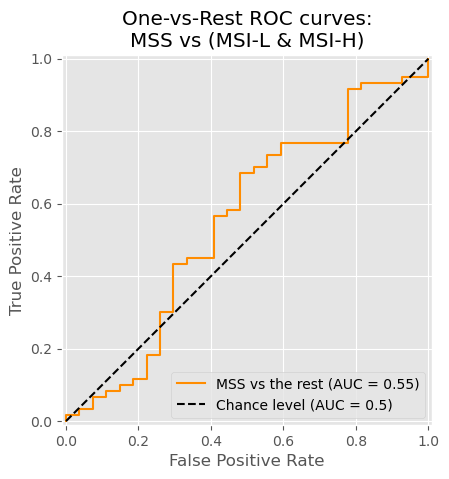

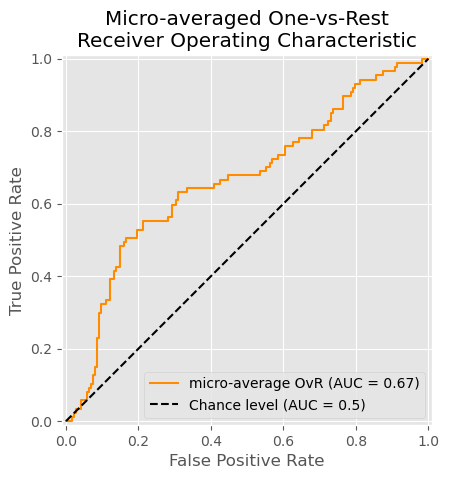

In [109]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
plt.style.use('ggplot')

#Feeding the best classifier gotten from the randomized search, and also using probability estimates for the roc curve
classifier = svm.SVC(kernel='rbf', C=0.5777541877593805, gamma='scale', probability=True, random_state=42)
y_score = classifier.fit(X_train_oversampled, y_train_oversampled).predict_proba(X_val)

from sklearn.preprocessing import LabelBinarizer
#Target of shape n_samples is mapped to target of shape n_samples, n_classes
label_binarizer = LabelBinarizer().fit(y_train_oversampled)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

class_of_interest = "MSS"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
#Plotting MSS against MSI L and H
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nMSS vs (MSI-L & MSI-H)",
)

print('ROC curve using micro-averaged OvR')
print(f"y_score:\n{y_score[0:2,:]}")
print()
print(f"y_score.ravel():\n{y_score[0:2,:].ravel()}")
#In case of multi-class classification with highly imbalanced classes, micro averaging is preferable over macro-averaging
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

from sklearn.metrics import roc_auc_score
#In case where the main interest is not the plot but the roc-auc score itself, we can reproduce the value shown in the plot usig rocaucscore

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

from sklearn.metrics import auc, roc_curve
#this is equivavlent to the previous but using roc curve and auc for the raveled true and predicted classes
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
#This is macro from here
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

In [120]:
target_names = ['MSI-H', 'MSI-L', 'MSS']

In [124]:
class_of_interest = "MSI-H"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

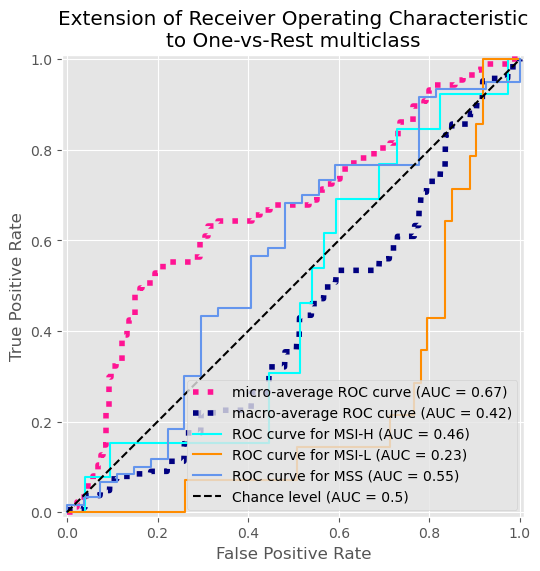

In [121]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [47]:
#Feature importance for polynomial kernel with permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_model_rand, X_val, y_val)
# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()
# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)
# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


KeyboardInterrupt: 

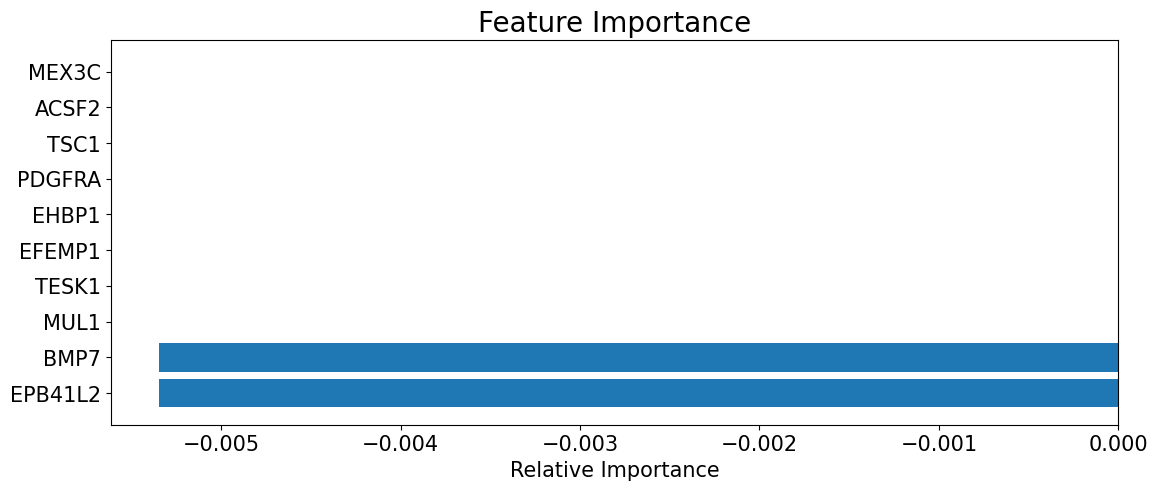

In [92]:
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx[:10]],perm_importance_normalized[sorted_idx[:10]], align='center')
#plt.hist(perm_importance_normalized[sorted_idx])
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [93]:
features[sorted_idx]

array(['EPB41L2', 'BMP7', 'MUL1', ..., 'PHGR1', 'ALOX5', 'MALAT1'],
      dtype=object)

In [94]:
perm_importance_normalized[sorted_idx[:100]]

array([-0.00534759, -0.00534759,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

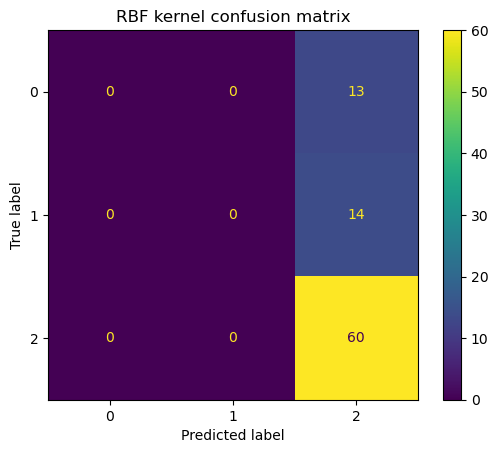

In [31]:
#Confusion mx for rbf kernel oversampled
conf_mx = metrics.confusion_matrix(y_test, over_rbf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mx)
cm_display.plot()
plt.title("RBF kernel confusion matrix")

plt.savefig('RBF kernel confusion matrix.png')
plt.show()

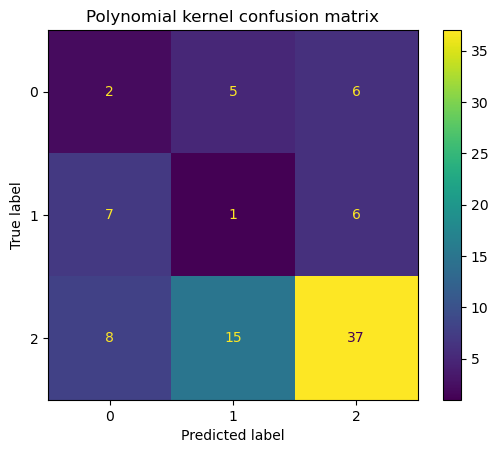

In [30]:
#confusion mx for polynomial oversampled 
conf_mx = metrics.confusion_matrix(y_test, over_poly_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mx)
cm_display.plot()

plt.title("Polynomial kernel confusion matrix")
plt.savefig('Polynomial kernel confusion matrix.png')
plt.show()